# Метро | Расположение складов

Построить граф  
От 100 вершин и больше  
Веса к ребрам — время прохождения от одного к другому 3-7  
Склады на метро — не более 25 мин  

Минимальное количество складов  

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import math

In [2]:
num_of_nodes = 100
num_of_edges = 100
max_time = 25
min_range_time = 3
max_range_time = 7

In [3]:
G = nx.connected_watts_strogatz_graph(num_of_nodes, 2, 0.4)

G_edges = list(G.edges())
for edge in G_edges:
    G[edge[0]][edge[1]]['time'] = random.randint(min_range_time,
                                                 max_range_time)

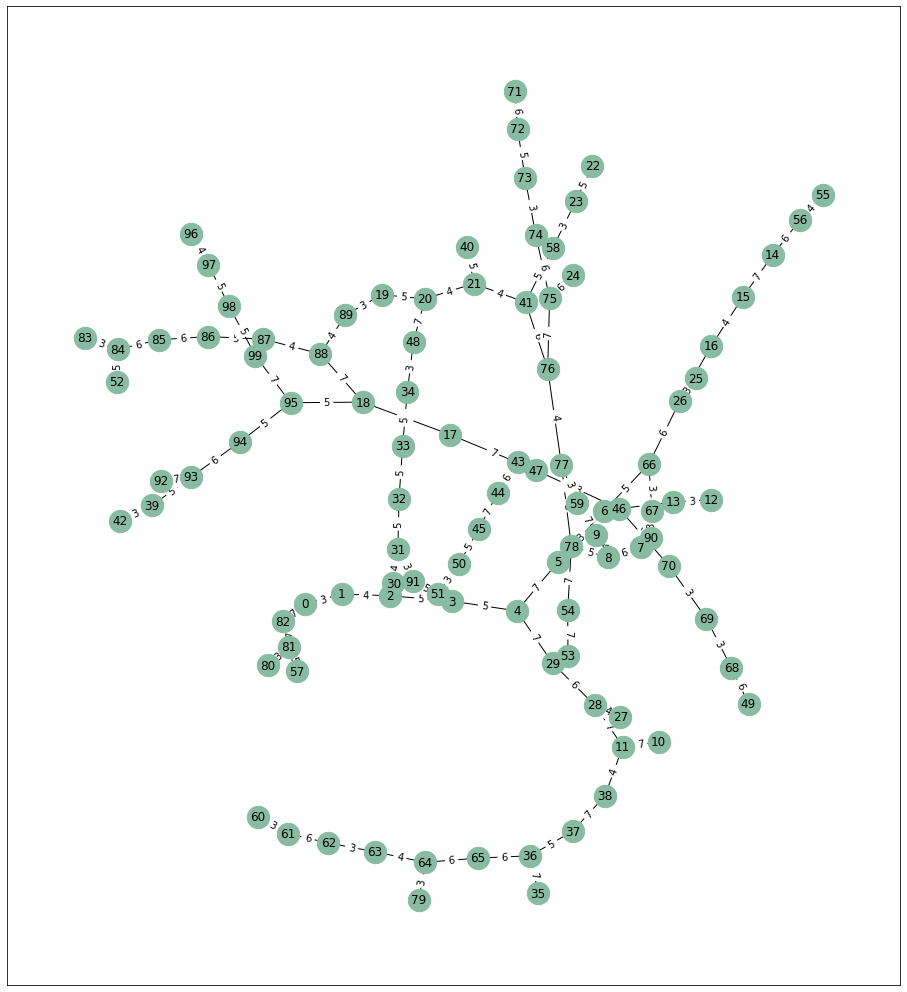

In [4]:
plt.figure(figsize=(16, 18))
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, "time")
nx.draw_networkx(G, pos, node_color='#87BBA2', node_size=500)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
print()

Подсчет идет от каждой вершины ко всем другим, по минимальному по времени маршруту. Получаются разные варианты, поэтому в конце я усредняю значение

In [5]:
def func_chunk(lst, n):
    res = []
    splits = np.array_split(lst, n)
    for array_split in splits:
        res.append(list(array_split))
    return res

In [6]:
def finding_warehouses(G, start_node, num_of_nodes):
    node_set = list(range(0, num_of_nodes))
    node_set.remove(start_node)
    warehouses = []
    for node in node_set:
        shortest_path = nx.shortest_path(G, start_node, node, 'time')
        rangee = list(sorted(list(set(shortest_path) & set(warehouses))))
        if rangee:
            n = 0
            for path_node in shortest_path:
                if path_node in warehouses:
                    shortest_path_time = nx.shortest_path_length(G, n, path_node, 'time')
                    if shortest_path_time > max_time :
                        chunks = math.ceil(shortest_path_time / max_time )
                        num_of_warehouses = list(func_chunk(
                            nx.shortest_path(G, n, path_node, 'time'),chunks))
                        
                        for wh in num_of_warehouses[:-1]:
                            if not wh[-1] in warehouses:
                                warehouses.append(wh[-1]) 
                    n = path_node
            shortest_path_time = nx.shortest_path_length(G, n, node, 'time')
            if shortest_path_time > max_time :
                chunks = math.ceil(shortest_path_time / max_time )
                num_of_warehouses = list(func_chunk(
                    nx.shortest_path(G, n, node, 'time'), chunks))
                
                for wh in num_of_warehouses[:-1]:
                    if not wh[-1] in warehouses:
                        warehouses.append(wh[-1]) 
                if nx.shortest_path_length(G, wh[-1], 
                                           num_of_warehouses[-1][-1], 
                                           'time') > max_time :
                    warehouses.append(num_of_warehouses[-1][-1]) 
                    
        else:
            shortest_path_time = nx.shortest_path_length(G, start_node, 
                                                         node, 'time')
            if shortest_path_time > max_time:
                num_of_warehouses = list(func_chunk(
                    nx.shortest_path(G, start_node, node, 'time'), 
                    shortest_path_time // max_time  ))
                
                for wh in num_of_warehouses[:-1]:
                    warehouses.append(wh[-1])
    
    warehouses.append(start_node)
    
    return warehouses

In [7]:
max_num, min_num, average_num = 0, 10_000, 0
all_times = {}
for i in range(0,num_of_nodes):
    warehouses = finding_warehouses(G, i, num_of_nodes)
    len_wh = len(warehouses)
    average_num += len_wh
    all_times[i] = len_wh
    max_num = len_wh if len_wh > max_num else max_num
    min_num = len_wh if len_wh < min_num else min_num
    
average_num = average_num / num_of_nodes
print(f'\nНеобходимое кол-во складов (усредненное): {round(average_num)}\n')
# print(f'Минимальное: {min_num}')
# print(f'Максимальное: {max_num}')


Необходимое кол-во складов (усредненное): 18




Красные - станции метро, где расположены расположение склады 
Cиние - все остальные станции метро


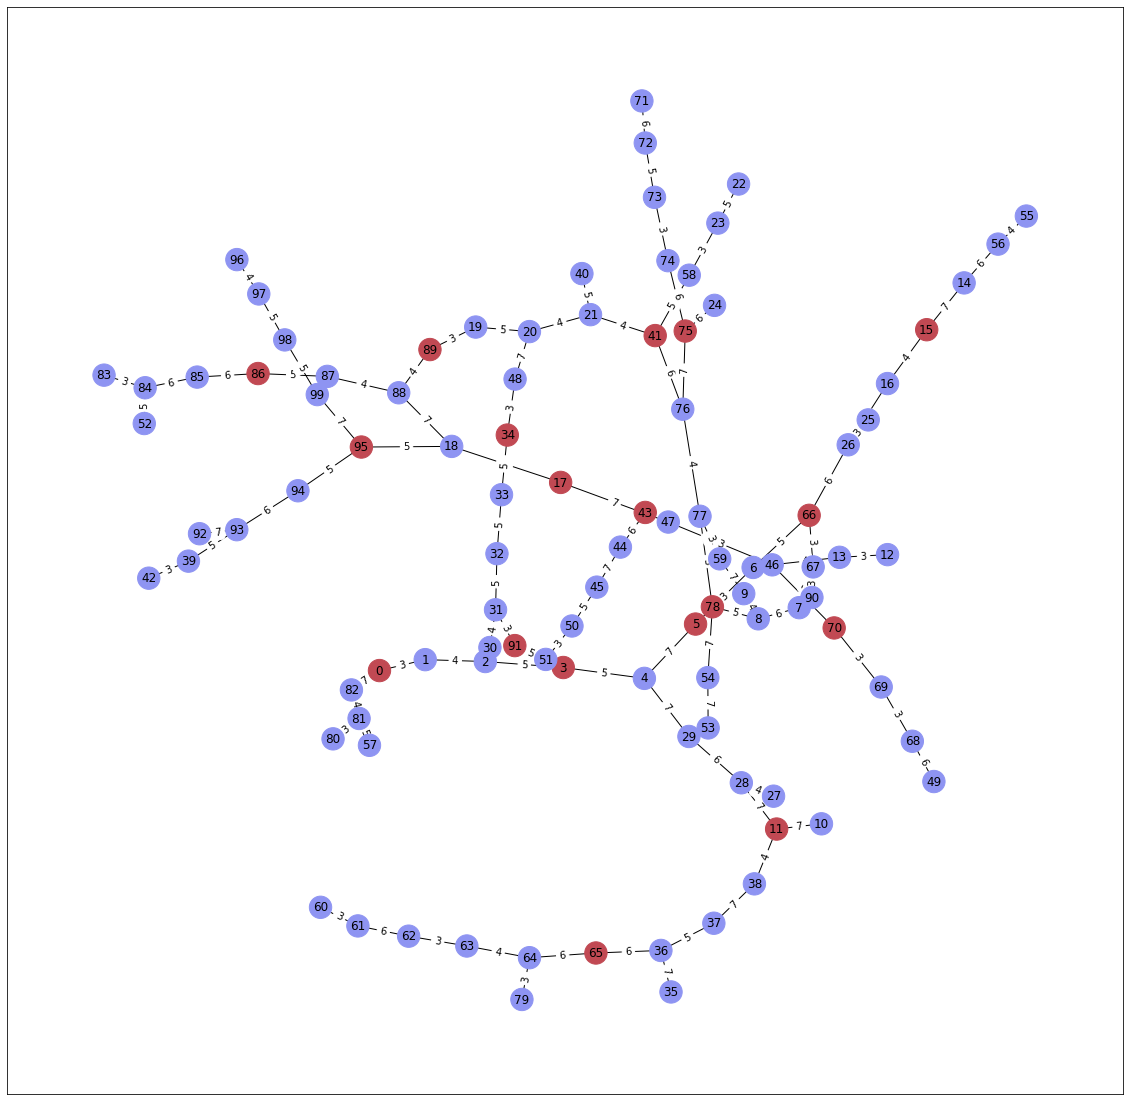

In [8]:
s_point = 5
warehouses = finding_warehouses(G, s_point, num_of_nodes)
plt.figure(figsize=(20, 20))
color_map = ['#C14953' if node in warehouses else '#8E94F2' for node in G]  
nx.draw_networkx(G,pos, node_color=color_map, node_size=500) 
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)

print("\nКрасные - станции метро, где расположены расположение склады \nCиние - все остальные станции метро")

In [9]:
print('\nВсе значения\nНачальная вершина -> кол-во складов\n')
for k,v in all_times.items():
    print(f'{k} -> {v} складов')


Все значения
Начальная вершина -> кол-во складов

0 -> 18 складов
1 -> 16 складов
2 -> 16 складов
3 -> 18 складов
4 -> 18 складов
5 -> 18 складов
6 -> 17 складов
7 -> 19 складов
8 -> 19 складов
9 -> 20 складов
10 -> 19 складов
11 -> 17 складов
12 -> 17 складов
13 -> 17 складов
14 -> 20 складов
15 -> 19 складов
16 -> 19 складов
17 -> 16 складов
18 -> 14 складов
19 -> 15 складов
20 -> 17 складов
21 -> 18 складов
22 -> 21 складов
23 -> 20 складов
24 -> 18 складов
25 -> 19 складов
26 -> 17 складов
27 -> 19 складов
28 -> 17 складов
29 -> 20 складов
30 -> 19 складов
31 -> 17 складов
32 -> 17 складов
33 -> 16 складов
34 -> 17 складов
35 -> 19 складов
36 -> 17 складов
37 -> 16 складов
38 -> 18 складов
39 -> 21 складов
40 -> 19 складов
41 -> 18 складов
42 -> 21 складов
43 -> 20 складов
44 -> 20 складов
45 -> 19 складов
46 -> 16 складов
47 -> 17 складов
48 -> 17 складов
49 -> 18 складов
50 -> 18 складов
51 -> 18 складов
52 -> 19 складов
53 -> 19 складов
54 -> 20 складов
55 -> 19 складов
56 -> 1